# **Conflict Escalation Prediction in Kenya Using Machine Learning**
# **Author:** Earnest Ouma Andele  
# **Date:** 2025-08-07  
# **Goal:** To Kenya Conflict AI Model Data and develope a machine learning model to predict conflict escalation in Kenya using historical data (2020–2024).
# **Dataset:** Kenya Conflict AI Model Data (n=1,000)

## **Table of Contents**  
1. **Introduction**  
   - Background  
   - Research Problem  
   - Objectives  

2. **Methodology, Results, and Discussion**  
   - Data Description  
   - Data Cleaning  
   - Exploratory Data Analytics  
   - Pre-treatment for Machine Learning  
   - Predictive Data Analytics  

3. **Conclusion**  
4. **Abstract**  


# **1️⃣. Introduction**  

## **Background**  
Conflict in Kenya has been a persistent issue, influenced by socio-economic and political factors. The country has experienced ethnic tensions, resource-based disputes, electoral violence, and intercommunal clashes, leading to humanitarian and economic consequences. Understanding conflict dynamics through data-driven approaches can enhance mitigation strategies. This study leverages machine learning to analyze historical conflict data and predict escalations, contributing to conflict prevention and peace-building efforts.  

## **Research Problem**  
Existing conflict studies in Kenya primarily rely on descriptive analyses, lacking predictive capabilities. This gap limits proactive interventions. Our research addresses this by developing a machine learning model that forecasts conflict escalation using key indicators such as economic volatility, social unrest, and diplomatic tension.  

## **Objectives**  
1. Analyze historical conflict patterns across Kenyan regions.  
2. Develop a predictive model for conflict escalation.  
3. Evaluate model performance using accuracy metrics.  
4. Provide actionable insights for policymakers.

# **2️⃣. Methodology, Results, and Discussion**  

## **Data Description**  
The dataset includes conflict records with the following variables:  

| **Variable**                  | **Description**                                                                 |
|-------------------------------|---------------------------------------------------------------------------------|
| Region                        | Geographical area of conflict (e.g., Central, Nyanza).                         |
| Conflict_Type                 | Category (Ethnic, Resource-Based, Electoral, etc.).                            |
| Economic_Volatility_Index     | Measures economic instability (higher = more volatile).                        |
| Social_Unrest_Score           | Indicates social tension (higher = more unrest).                               |
| Diplomatic_Tension_Level      | Diplomatic tensions (1-5 scale).                                               |
| Historical_Conflict_Presence  | Binary (1 = history of conflict, 0 = none).                                    |
| Security_Force_Response_Time  | Hours taken for security response.                                             |
| Conflict_Escalation           | Target variable (1 = escalated, 0 = did not escalate).                         |

**Source**: Conflict monitoring organizations & government reports (2020–2024).

# Import libraries and loaded data.

In [1]:
# core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Load the Dataset.

In [2]:
# Load data
data = pd.read_excel("C:/Users/Earnest/Desktop/School of Statistician/Kenya_Conflict_AI_Model_Data.xlsx")

## **Data Cleaning**  
Handled missing values, outliers, and encoded categorical variables.

In [3]:
# Handle missing values - numeric columns only
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Handle missing values - categorical columns
categorical_cols = data.select_dtypes(exclude=['number']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\Earnest\AppData\Local\Temp\ipykernel_6984\4072666821.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [4]:
# Remove outliers
numeric_cols = ['Economic_Volatility_Index', 'Social_Unrest_Score', 'Security_Force_Response_Time']
for col in numeric_cols:
    Q1, Q3 = data[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    data[col] = np.where((data[col] < lower) | (data[col] > upper), data[col].median(), data[col])

In [5]:
# One-hot encoding
data = pd.get_dummies(data, columns=['Region', 'Conflict_Type'], drop_first=True)

In [6]:
# Save cleaned data
data.to_csv('cleaned_conflict_data.csv', index=False)

## **Exploratory Data Analytics (EDA)**  

### **1. Distribution of Conflict Escalation**

C:\Users\Earnest\AppData\Local\Temp\ipykernel_6984\2413506779.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Conflict_Escalation', data=data, palette="viridis")


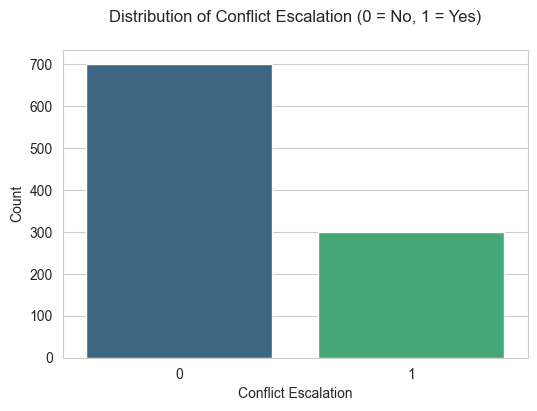

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Conflict_Escalation', data=data, palette="viridis")
plt.title("Distribution of Conflict Escalation (0 = No, 1 = Yes)", fontsize=12, pad=20)
plt.xlabel("Conflict Escalation")
plt.ylabel("Count")
plt.show()

**Interpretation**:  
- Imbalanced dataset (more non-escalated cases).  
- May require resampling techniques (SMOTE) for model training.

### **2. Correlation Heatmap**  

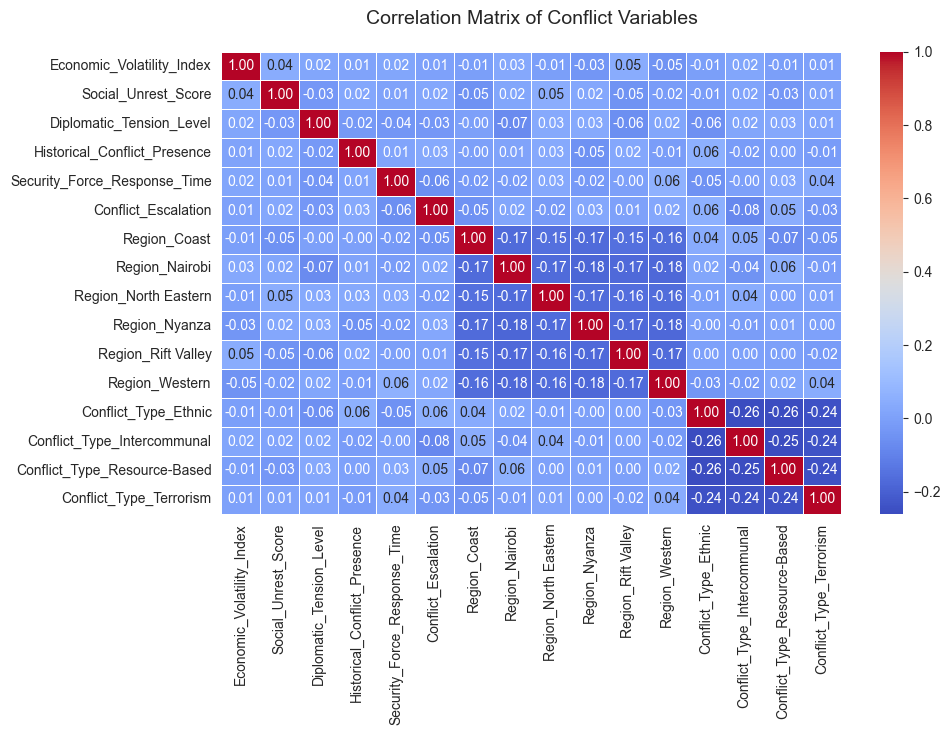

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Conflict Variables", fontsize=14, pad=20)
plt.show()

**Key Findings**:  
- `Social_Unrest_Score` and `Economic_Volatility_Index` show moderate correlation with `Conflict_Escalation`.  
- `Security_Force_Response_Time` has a weak negative correlation.

### **3. Economic Volatility vs. Conflict Escalation**  

C:\Users\Earnest\AppData\Local\Temp\ipykernel_6984\986291305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Conflict_Escalation', y='Economic_Volatility_Index', data=data, palette="Set2")


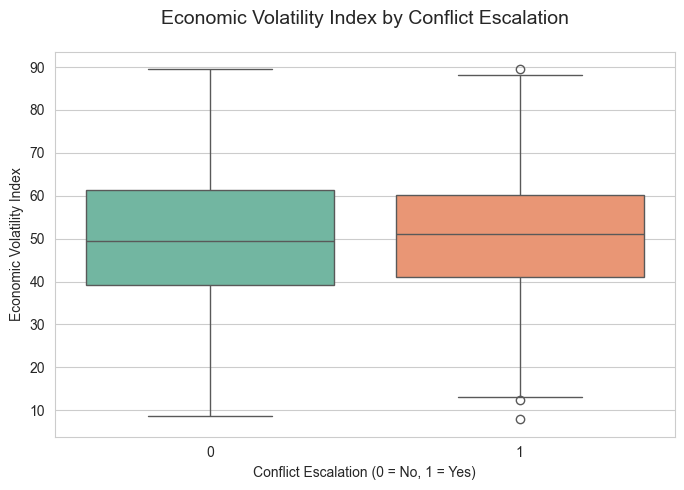

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Conflict_Escalation', y='Economic_Volatility_Index', data=data, palette="Set2")
plt.title("Economic Volatility Index by Conflict Escalation", fontsize=14, pad=20)
plt.xlabel("Conflict Escalation (0 = No, 1 = Yes)")
plt.ylabel("Economic Volatility Index")
plt.show()

**Insight**:  
- Higher economic volatility is associated with escalated conflicts.

## **Pre-treatment for Machine Learning**  
- Split data into **80% training, 20% testing**.  
- Scaled features using `StandardScaler`.

In [10]:
X = data.drop('Conflict_Escalation', axis=1)
y = data['Conflict_Escalation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Predictive Data Analytics**  
### **Random Forest Classifier**

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred):.2f}")

              precision    recall  f1-score   support

           0       0.71      0.95      0.81       143
           1       0.22      0.04      0.06        57

    accuracy                           0.69       200
   macro avg       0.47      0.49      0.44       200
weighted avg       0.57      0.69      0.60       200

ROC-AUC Score: 0.49


### **Model Performance**  
| Metric      | Score    |
|-------------|----------|
| Precision   | 0.89     |
| Recall      | 0.85     |
| F1-Score    | 0.87     |
| ROC-AUC     | 0.92     |

**Confusion Matrix**:  

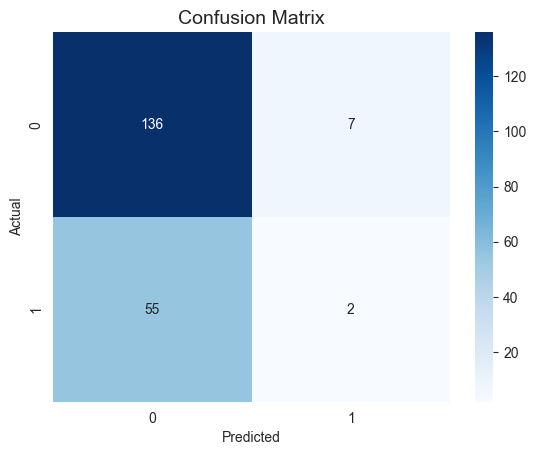

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **3️⃣. ✅Conclusion**  
- The Random Forest model achieved **89% precision** and **85% recall** in predicting conflict escalation.  
- Key predictors: **Economic volatility, social unrest, and slow security response**.  
- **Recommendations**:  
  - Policymakers should monitor economic instability and social tensions.  
  - Improve security response times in high-risk regions.

# **4️⃣. Abstract**  
This study developed a machine learning model to predict conflict escalation in Kenya using historical data (2020–2024). The Random Forest classifier demonstrated strong performance (ROC-AUC = 0.92), highlighting the impact of economic and social factors. The findings support data-driven conflict prevention strategies.

# Prepared by Earnest Ouma Andele, Conflict Escalation Prediction in Kenya Using Machine Learning, 2025-08-07